# Using only matplotlib to create colormaps

In [1]:
import xarray as xr
import numpy as np
import matplotlib
from matplotlib import colors
import matplotlib.pyplot as plt

In [2]:
df = xr.open_dataset('snap.cdf')
df

<xarray.Dataset> Size: 508MB
Dimensions:  (x: 252, y: 252, z: 20, Time: 10)
Coordinates:
  * x        (x) float64 2kB 0.0 992.1 1.984e+03 ... 2.47e+05 2.48e+05 2.49e+05
  * y        (y) float64 2kB 0.0 992.1 1.984e+03 ... 2.47e+05 2.48e+05 2.49e+05
  * z        (z) float64 160B 0.0 100.0 200.0 300.0 ... 1.7e+03 1.8e+03 1.9e+03
  * Time     (Time) float64 80B 0.0 8.64e+04 1.728e+05 ... 6.912e+05 7.776e+05
Data variables:
    u        (Time, z, y, x) float64 102MB ...
    v        (Time, z, y, x) float64 102MB ...
    w        (Time, z, y, x) float64 102MB ...
    b        (Time, z, y, x) float64 102MB ...
    p        (Time, z, y, x) float64 102MB ...
Attributes:
    dx:       992.063492063492
    dy:       992.063492063492
    dz:       100.0
    N0:       0.0029999999242136255
    f0:       9.999999747378752e-05
    Ro:       1.0
    dsqr:     1.0

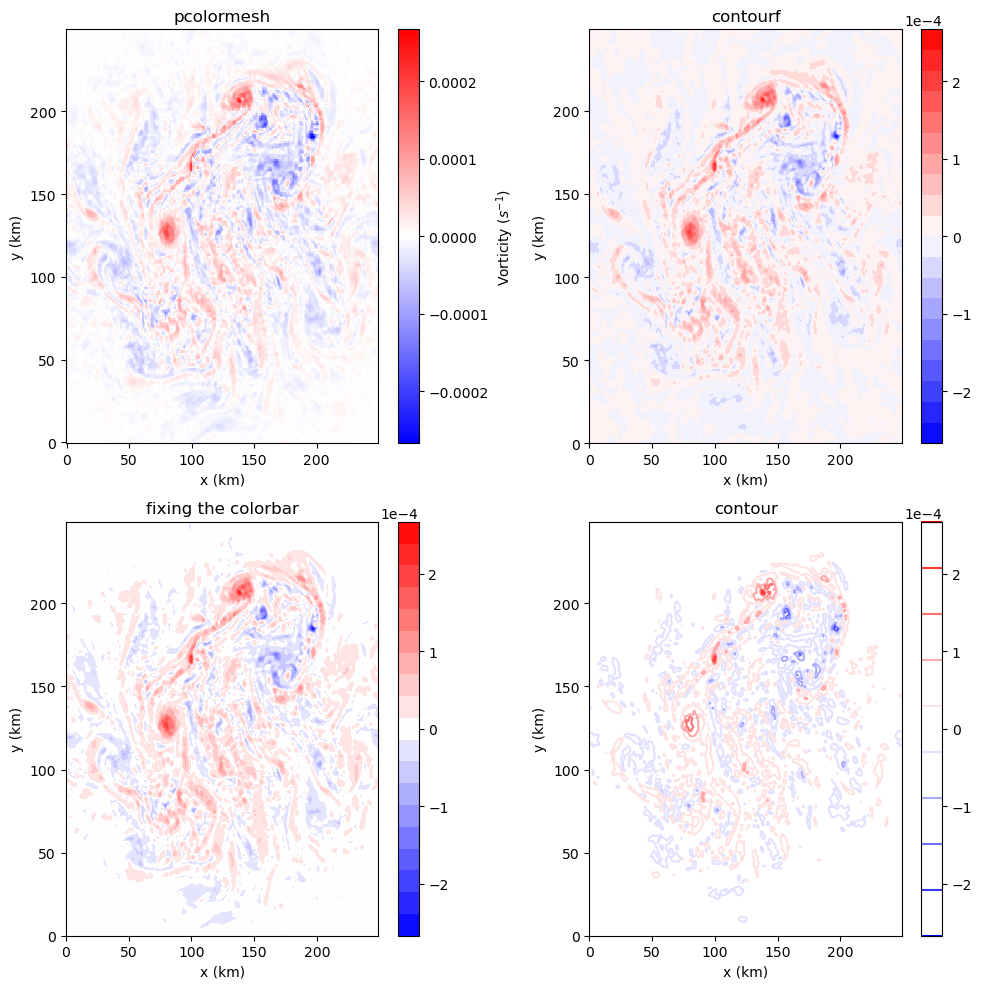

In [3]:
fig, axs = plt.subplots(figsize=(10,10),ncols=2, nrows=2)

vorticity = df.v[3,0,:,:].differentiate('x') - df.u[3,0,:,:].differentiate('y')
pcolormesh = axs[0, 0].pcolormesh(df.x/1000,df.y/1000,vorticity,cmap='bwr',vmin=-np.max(np.abs(vorticity)),vmax=np.max(np.abs(vorticity)))
axs[0, 0].set_xlabel('x (km)')
axs[0, 0].set_ylabel('y (km)')
axs[0, 0].set_title(r'pcolormesh')
# Add the colorbar
plt.colorbar(pcolormesh ,ax=axs[0, 0],label=r'Vorticity $(s^{-1})$')


contourf = axs[0, 1].contourf(df.x/1000,df.y/1000,vorticity,cmap='bwr',levels=np.linspace(-np.max(np.abs(vorticity)),np.max(np.abs(vorticity)),21))
axs[0, 1].set_xlabel('x (km)')
axs[0, 1].set_ylabel('y (km)')
axs[0, 1].set_title(r'contourf')
# Add the colorbar
# you can add the automatic one, but it is not very nice
# plt.colorbar(contourf ,ax=axs[0, 1])
# you can instead use the scientific notation for the formating
#cbar = plt.colorbar(contourf ,ax=axs[0, 1], ticks=[-2e-4,-1e-4,0,1e-4,2e-4], format='%.0e')
# or you can use the matplotlib formatter and add the power only to the top
cbar = plt.colorbar(contourf ,ax=axs[0, 1], ticks=[-2e-4,-1e-4,0,1e-4,2e-4])
cbar.formatter.set_powerlimits((0, 0))

my_levels = np.linspace(-np.max(np.abs(vorticity)),np.max(np.abs(vorticity)) ,20)
contourf = axs[1, 0].contourf(df.x/1000,df.y/1000,vorticity,cmap='bwr',levels=my_levels)
axs[1, 0].set_xlabel('x (km)')
axs[1, 0].set_ylabel('y (km)')
axs[1, 0].set_title(r'fixing the colorbar')
# Add the colorbar
cbar = plt.colorbar(contourf ,ax=axs[1, 0], ticks=[-2e-4,-1e-4,0,1e-4,2e-4])
cbar.formatter.set_powerlimits((0, 0))


my_levels = np.linspace(-np.max(np.abs(vorticity)),np.max(np.abs(vorticity)) ,10)
contourf = axs[1, 1].contour(df.x/1000,df.y/1000,vorticity,cmap='bwr',levels=my_levels)
axs[1, 1].set_xlabel('x (km)')
axs[1, 1].set_ylabel('y (km)')
axs[1, 1].set_title(r'contour')
# Add the colorbar
cbar = plt.colorbar(contourf ,ax=axs[1, 1], ticks=[-2e-4,-1e-4,0,1e-4,2e-4])
cbar.formatter.set_powerlimits((0, 0))


plt.tight_layout()
plt.show()

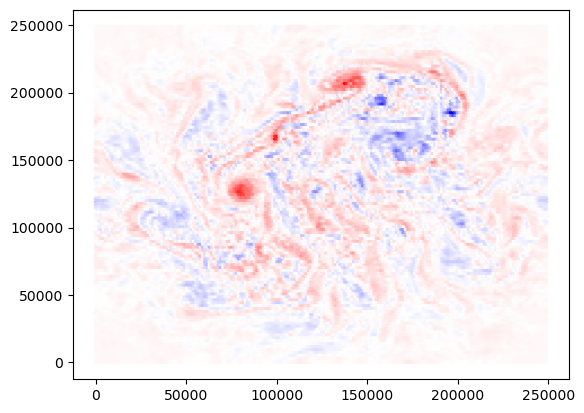

In [4]:
x,y = np.meshgrid(df.x,df.y)
plt.hexbin(x.flatten(),y.flatten(),C=vorticity.values.flatten(),cmap='bwr',gridsize=200)

# You want to give some texture, lets try shading

Some interfaces like Mathematica use this tool, but its also interesting for mapping tasks.

For smooth surfaces (like water, eddies, waves...) is "hsv" blendging better, while for rough surfaces (like orography maps) is "overlay" better.

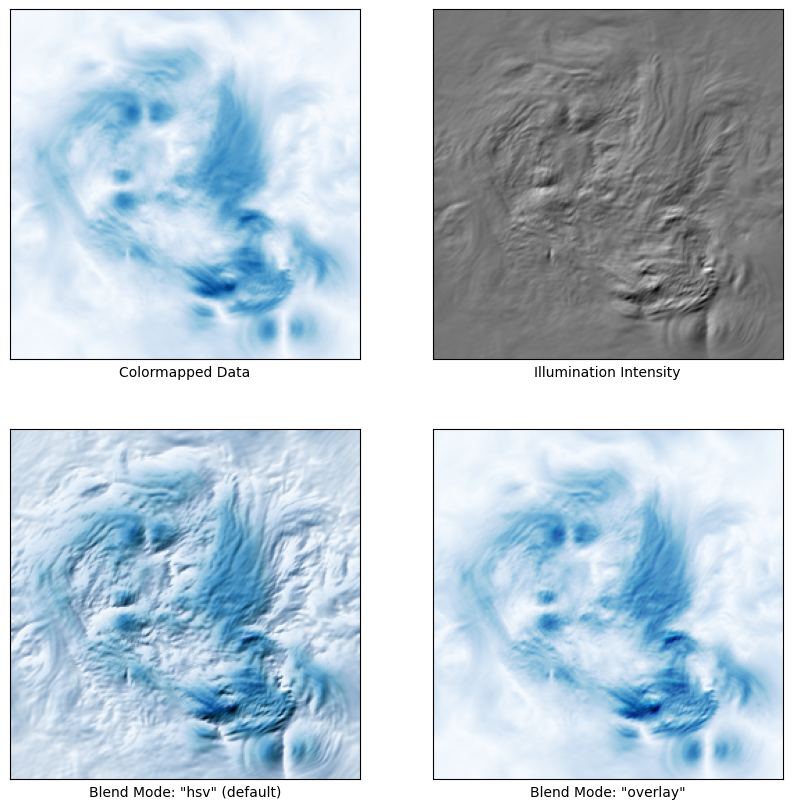

In [6]:
from matplotlib.colors import LightSource

cmap=plt.cm.Blues
ve=0.1

z = np.sqrt(df.u[3,0,:,:].values **2+df.v[-1,0,:,:].values **2)
# Create subplots and hide ticks
fig, axs = plt.subplots(figsize=(10,10),ncols=2, nrows=2)
for ax in axs.flat:
    ax.set(xticks=[], yticks=[])

# Illuminate the scene from the northwest
ls = LightSource(azdeg=315, altdeg=45)

axs[0, 0].imshow(z, cmap=cmap)
axs[0, 0].set(xlabel='Colormapped Data')

axs[0, 1].imshow(ls.hillshade(z, vert_exag=ve), cmap='gray')
axs[0, 1].set(xlabel='Illumination Intensity')

rgb = ls.shade(z, cmap=cmap, vert_exag=ve, blend_mode='hsv')
axs[1, 0].imshow(rgb)
axs[1, 0].set(xlabel='Blend Mode: "hsv" (default)')

rgb = ls.shade(z, cmap=cmap, vert_exag=ve, blend_mode='overlay')
axs[1, 1].imshow(rgb)
axs[1, 1].set(xlabel='Blend Mode: "overlay"')

plt.show()

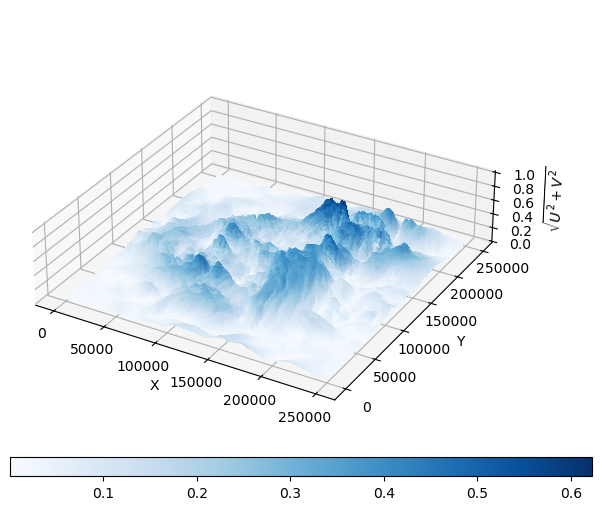

In [7]:
from matplotlib import cbook, cm
x, y = np.meshgrid(df.x.values, df.y.values)

# Set up plot
fig, ax = plt.subplots(figsize=(10,7),subplot_kw=dict(projection='3d'))
ax.set_box_aspect([4, 4, 1])


ls = LightSource(270, 45)
# To use a custom hillshading mode, override the built-in shading and pass
# in the rgb colors of the shaded surface calculated from "shade".
z = np.sqrt(df.u[3,0,:,:].values **2+df.v[-1,0,:,:].values **2)
rgb = ls.shade(z, cmap=cm.Blues, vert_exag=0.1, blend_mode='soft')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=rgb,
                       linewidth=0, antialiased=False, shade=False)
ax.set_zlim(0, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel(r'$\sqrt{U^2+V^2}$')

# Create a ScalarMappable and initialize a data structure to use for the colorbar
m = cm.ScalarMappable(cmap=cm.Blues)
m.set_array(z)
plt.colorbar(m, ax=ax,shrink=0.6, aspect=30,location='bottom',orientation='horizontal', anchor=(0.6, 2.5))

plt.tight_layout()
plt.show()